In [448]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
assert sys.version_info >= (3, 5)
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import matplotlib as mpl
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [449]:
df = pd.read_csv('c:\\flight.csv')

In [450]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [452]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'days_left'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

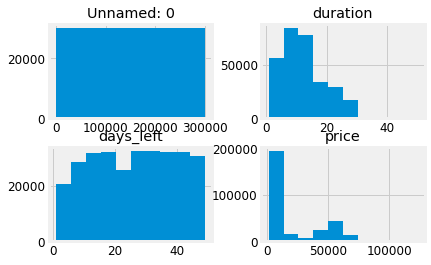

In [453]:
df.hist()

In [454]:
import matplotlib

In [455]:
dd = df.drop(index = df[df['source_city'] != "Delhi"].index)

In [456]:
dd

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
224977,224977,Vistara,UK-955,Delhi,Evening,one,Morning,Chennai,Business,15.08,49,68184
224978,224978,Air_India,AI-883,Delhi,Night,two_or_more,Morning,Chennai,Business,12.92,49,70323
224979,224979,Vistara,UK-829,Delhi,Early_Morning,two_or_more,Evening,Chennai,Business,12.83,49,71376
224980,224980,Vistara,UK-819,Delhi,Afternoon,two_or_more,Night,Chennai,Business,8.83,49,76684


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'days_left'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

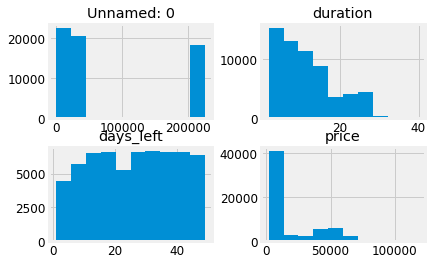

In [457]:
dd.hist()

In [458]:
dd.drop(columns=['flight'], inplace=True)

In [459]:
dd.drop(columns=['source_city'], inplace=True)

In [460]:
dd.drop(columns=['Unnamed: 0'], inplace=True)

In [461]:
dd

,airline,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
224977,Vistara,Evening,one,Morning,Chennai,Business,15.08,49,68184
224978,Air_India,Night,two_or_more,Morning,Chennai,Business,12.92,49,70323
224979,Vistara,Early_Morning,two_or_more,Evening,Chennai,Business,12.83,49,71376
224980,Vistara,Afternoon,two_or_more,Night,Chennai,Business,8.83,49,76684


In [462]:
dd['airline'].value_counts()

Vistara      23368
Air_India    17063
Indigo        8277
GO_FIRST      5724
AirAsia       4387
SpiceJet      2524
Name: airline, dtype: int64

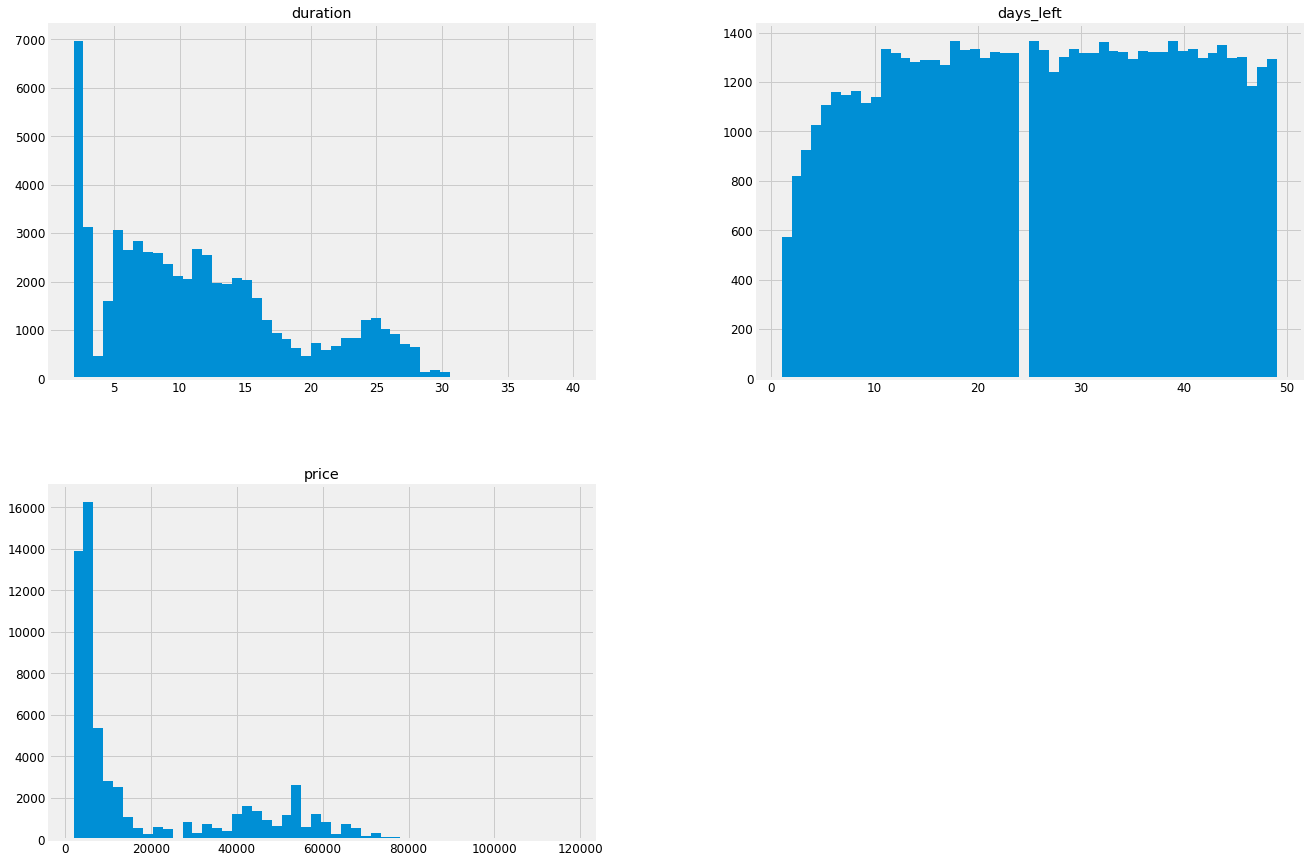

In [463]:
%matplotlib inline
import matplotlib.pyplot as plt
dd.hist(bins=50, figsize=(20,15))

plt.show()

In [464]:
np.random.seed(42) 
#to make every run the same

In [465]:
dd.info()#no missing value 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61343 entries, 0 to 224981
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           61343 non-null  object 
 1   departure_time    61343 non-null  object 
 2   stops             61343 non-null  object 
 3   arrival_time      61343 non-null  object 
 4   destination_city  61343 non-null  object 
 5   class             61343 non-null  object 
 6   duration          61343 non-null  float64
 7   days_left         61343 non-null  int64  
 8   price             61343 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 4.7+ MB


In [466]:
dd.describe()

,duration,days_left,price
count,61343.000000,61343.000000,61343.000000
mean,11.515499,25.970168,18951.326639
std,7.336256,13.633365,20920.410359
min,1.920000,1.000000,1998.000000
25%,5.750000,14.000000,4496.000000
50%,10.250000,26.000000,6840.000000
75%,15.580000,38.000000,35490.000000
max,39.670000,49.000000,117307.000000


<AxesSubplot:xlabel='price', ylabel='airline'>

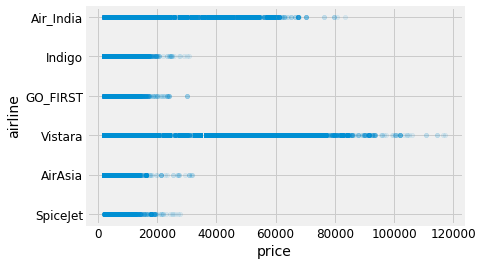

In [467]:
#correlation between airline and price
dd.plot(kind="scatter", x="price", y="airline", alpha=0.1)

In [468]:
#getting all the dummies from airline column and put it in Airline variable 
Airline = dd[['airline']]
Airline = pd.get_dummies(Airline, 
                        )
#هاي قامت عمود ما كنت بعرف هاد الشي
#we'll use oneHotencoding 

In [469]:
Airline

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
224977,0,0,0,0,0,1
224978,0,1,0,0,0,0
224979,0,0,0,0,0,1
224980,0,0,0,0,0,1


In [470]:
dd['destination_city'].value_counts()

Mumbai       15289
Bangalore    14012
Kolkata      11934
Chennai      10780
Hyderabad     9328
Name: destination_city, dtype: int64

<AxesSubplot:xlabel='price', ylabel='destination_city'>

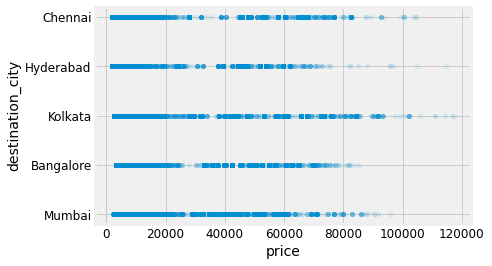

In [471]:
#correlation between destination_city and price
dd.plot(kind="scatter", x="price", y="destination_city", alpha=0.1)

In [472]:
#getting all the dummies from destination_city column and put it in Destination variable 
Destination = dd[['destination_city']]
Destination = pd.get_dummies(Destination)


In [473]:
Destination

,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
224977,0,1,0,0,0
224978,0,1,0,0,0
224979,0,1,0,0,0
224980,0,1,0,0,0


In [474]:
dd['stops'].value_counts()

one            48327
zero           10090
two_or_more     2926
Name: stops, dtype: int64

In [475]:
dd.replace({"zero":0, "one":1, "two_or_more":3}, inplace=True) #need iplace=True

In [476]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61343 entries, 0 to 224981
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           61343 non-null  object 
 1   departure_time    61343 non-null  object 
 2   stops             61343 non-null  int64  
 3   arrival_time      61343 non-null  object 
 4   destination_city  61343 non-null  object 
 5   class             61343 non-null  object 
 6   duration          61343 non-null  float64
 7   days_left         61343 non-null  int64  
 8   price             61343 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 4.7+ MB


In [477]:
dd

,airline,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
224977,Vistara,Evening,1,Morning,Chennai,Business,15.08,49,68184
224978,Air_India,Night,3,Morning,Chennai,Business,12.92,49,70323
224979,Vistara,Early_Morning,3,Evening,Chennai,Business,12.83,49,71376
224980,Vistara,Afternoon,3,Night,Chennai,Business,8.83,49,76684


In [478]:
dd.isnull().sum()

airline             0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [479]:
dd['departure_time'].value_counts()

Evening          16790
Morning          13679
Early_Morning    12248
Afternoon        11234
Night             7035
Late_Night         357
Name: departure_time, dtype: int64

In [480]:
#the more stops the more price also depends on destination 
ddd = pd.concat([dd, Airline, Destination], axis=1)

In [481]:
ddd.head()

,airline,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Evening,0,Night,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,SpiceJet,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,Vistara,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,Vistara,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1


In [482]:

ddd.drop(['destination_city','airline'], axis=1)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Evening,0,Night,Economy,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,Early_Morning,0,Morning,Economy,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,Early_Morning,0,Early_Morning,Economy,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,Morning,0,Afternoon,Economy,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,Morning,0,Morning,Economy,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,Evening,1,Morning,Business,15.08,49,68184,0,0,0,0,0,1,0,1,0,0,0
224978,Night,3,Morning,Business,12.92,49,70323,0,1,0,0,0,0,0,1,0,0,0
224979,Early_Morning,3,Evening,Business,12.83,49,71376,0,0,0,0,0,1,0,1,0,0,0
224980,Afternoon,3,Night,Business,8.83,49,76684,0,0,0,0,0,1,0,1,0,0,0


In [483]:
ddd.head()

,airline,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Evening,0,Night,Mumbai,Economy,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,SpiceJet,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,AirAsia,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,Vistara,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,Vistara,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1


array([[<AxesSubplot:title={'center':'stops'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'days_left'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'airline_AirAsia'}>,
        <AxesSubplot:title={'center':'airline_Air_India'}>,
        <AxesSubplot:title={'center':'airline_GO_FIRST'}>,
        <AxesSubplot:title={'center':'airline_Indigo'}>],
       [<AxesSubplot:title={'center':'airline_SpiceJet'}>,
        <AxesSubplot:title={'center':'airline_Vistara'}>,
        <AxesSubplot:title={'center':'destination_city_Bangalore'}>,
        <AxesSubplot:title={'center':'destination_city_Chennai'}>],
       [<AxesSubplot:title={'center':'destination_city_Hyderabad'}>,
        <AxesSubplot:title={'center':'destination_city_Kolkata'}>,
        <AxesSubplot:title={'center':'destination_city_Mumbai'}>,
        <AxesSubplot:>]], dtype=object)

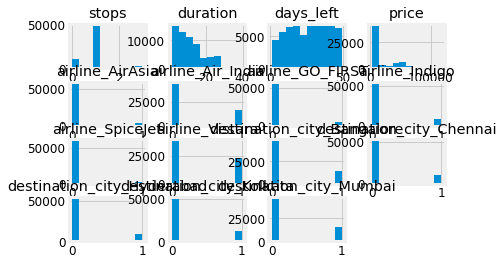

In [484]:
ddd.hist()

In [485]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [486]:
ddd.replace({"Economy":0, "Business":1}, inplace=True) #need iplace=True

In [487]:
ddd['class'].value_counts()

0    43027
1    18316
Name: class, dtype: int64

In [488]:
ddd.drop(columns=['destination_city','airline'], inplace=True)

In [489]:
ddd

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Evening,0,Night,0,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,Early_Morning,0,Morning,0,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,Early_Morning,0,Early_Morning,0,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,Morning,0,Afternoon,0,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,Morning,0,Morning,0,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,Evening,1,Morning,1,15.08,49,68184,0,0,0,0,0,1,0,1,0,0,0
224978,Night,3,Morning,1,12.92,49,70323,0,1,0,0,0,0,0,1,0,0,0
224979,Early_Morning,3,Evening,1,12.83,49,71376,0,0,0,0,0,1,0,1,0,0,0
224980,Afternoon,3,Night,1,8.83,49,76684,0,0,0,0,0,1,0,1,0,0,0


In [490]:
ddd['departure_time'].value_counts()

Evening          16790
Morning          13679
Early_Morning    12248
Afternoon        11234
Night             7035
Late_Night         357
Name: departure_time, dtype: int64

In [491]:
ddd.replace({"Early_Morning":0, "Morning":1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}, inplace=True) #need iplace=True

In [492]:
ddd

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,3,1,1,1,15.08,49,68184,0,0,0,0,0,1,0,1,0,0,0
224978,4,3,1,1,12.92,49,70323,0,1,0,0,0,0,0,1,0,0,0
224979,0,3,3,1,12.83,49,71376,0,0,0,0,0,1,0,1,0,0,0
224980,2,3,4,1,8.83,49,76684,0,0,0,0,0,1,0,1,0,0,0


In [493]:
ddd

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,3,1,1,1,15.08,49,68184,0,0,0,0,0,1,0,1,0,0,0
224978,4,3,1,1,12.92,49,70323,0,1,0,0,0,0,0,1,0,0,0
224979,0,3,3,1,12.83,49,71376,0,0,0,0,0,1,0,1,0,0,0
224980,2,3,4,1,8.83,49,76684,0,0,0,0,0,1,0,1,0,0,0


In [494]:
#until here we turn all data into numbers

<AxesSubplot:>

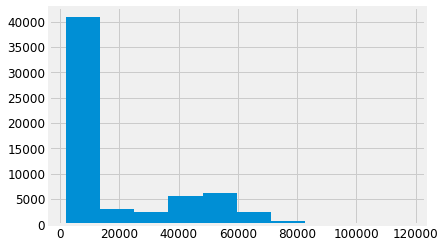

In [495]:
ddd['price'].hist()

In [496]:
from sklearn.model_selection import train_test_split

<AxesSubplot:>

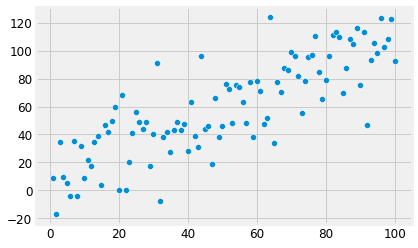

In [497]:
#بعرفش لشو
observation_count = 100
x_var = np.linspace(start = 1, stop = 100, num = observation_count)
np.random.seed(22)
y_var = x_var + np.random.normal(size = observation_count, loc = 10, scale = 20)
sns.scatterplot(x = x_var, y = y_var)

In [498]:
y = ddd['price']

In [499]:
x = ddd.drop(columns=['price'])

In [500]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
224977    68184
224978    70323
224979    71376
224980    76684
224981    82553
Name: price, Length: 61343, dtype: int64

In [501]:
x

,departure_time,stops,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,2.33,1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2.17,1,1,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,0,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,2.33,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,3,1,1,1,15.08,49,0,0,0,0,0,1,0,1,0,0,0
224978,4,3,1,1,12.92,49,0,1,0,0,0,0,0,1,0,0,0
224979,0,3,3,1,12.83,49,0,0,0,0,0,1,0,1,0,0,0
224980,2,3,4,1,8.83,49,0,0,0,0,0,1,0,1,0,0,0


In [502]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.8, test_size = 0.2, random_state = 7)

In [503]:
x_train

,departure_time,stops,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
22133,3,1,1,0,16.92,13,0,0,0,0,0,1,0,0,0,1,0
38004,3,1,1,0,15.75,20,1,0,0,0,0,0,0,1,0,0,0
6448,3,0,4,0,2.17,33,0,0,0,0,1,0,0,0,0,0,1
215835,3,1,0,1,12.00,49,0,0,0,0,0,1,1,0,0,0,0
30125,0,1,2,0,6.50,13,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217098,2,1,4,1,9.17,20,0,1,0,0,0,0,0,0,0,1,0
38467,2,1,4,0,5.92,23,1,0,0,0,0,0,0,1,0,0,0
10742,4,0,5,0,2.75,6,0,0,0,0,1,0,1,0,0,0,0
213328,4,1,0,1,10.00,18,0,0,0,0,0,1,1,0,0,0,0


In [504]:
x_test

,departure_time,stops,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
216996,4,1,3,1,22.08,18,0,0,0,0,0,1,0,0,0,1,0
17365,2,1,4,0,10.58,37,1,0,0,0,0,0,1,0,0,0,0
224585,2,1,0,1,16.75,44,0,1,0,0,0,0,0,1,0,0,0
26054,3,0,4,0,2.17,35,0,0,0,1,0,0,0,0,0,1,0
31385,2,1,4,0,8.08,22,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224135,1,1,1,1,24.25,37,0,1,0,0,0,0,0,1,0,0,0
4312,4,1,1,0,10.17,23,0,0,0,1,0,0,0,0,0,0,1
32808,1,1,4,0,12.58,32,0,1,0,0,0,0,0,0,1,0,0
13487,0,0,1,0,2.50,19,0,0,0,0,1,0,1,0,0,0,0


In [505]:
y_train

22133     13410
38004      3918
6448       2456
215835    62617
30125      9840
          ...  
217098    53209
38467      1998
10742      7425
213328    70233
222203    60232
Name: price, Length: 49074, dtype: int64

In [506]:
y_test

216996    80985
17365      4019
224585    45257
26054      3999
31385      5772
          ...  
224135    45257
4312       3963
32808      4209
13487      4721
37992      3306
Name: price, Length: 12269, dtype: int64

In [507]:
ddd.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,5953,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,2.33,1,5953,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2.17,1,5956,1,0,0,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,5955,0,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,0,0,1,0,0,0,0,1


In [531]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()

ml.fit (x_train,y_train)

LinearRegression()

In [532]:
y_pred=ml.predict(x_test)
print(y_pred)

[55632.46675533  2485.09620085 43857.53422649 ...  2601.06147334
  2181.10351141  6503.22721524]


In [533]:
ml.predict([[3,0,4,0,2.17,1,0,0,0,0,1,0,0,0,0,0,1]])

C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3519.82343267])

In [534]:
print ("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print ("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print ("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  4558.902398362947
MSE:  43215808.83778179
RMSE:  6573.873199095172


In [535]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.901228012558417

Text(0.5, 1.0, 'actual vs predict')

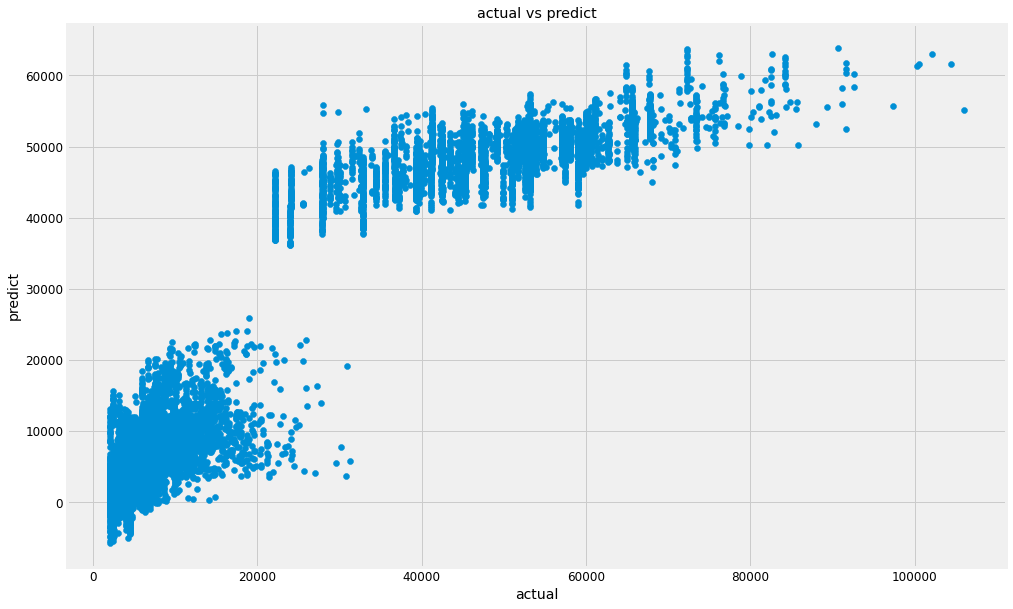

In [536]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('actual vs predict')

In [537]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'diffrence':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,diffrence
216996,80985,55632.466755,25352.533245
17365,4019,2485.096201,1533.903799
224585,45257,43857.534226,1399.465774
26054,3999,2986.027977,1012.972023
31385,5772,7998.302747,-2226.302747
35706,25590,19827.500958,5762.499042
3236,4328,1857.619256,2470.380744
15539,10273,7782.238485,2490.761515
39891,3389,5688.508453,-2299.508453
18947,4496,6704.435827,-2208.435827


In [538]:
#random forest
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)


RandomForestRegressor()

In [539]:
y_pred = reg_rf.predict(x_test)

In [540]:
reg_rf.score(x_train, y_train)

0.9975687331971244

In [541]:
reg_rf.score(x_test, y_test)

0.9868200485563008

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


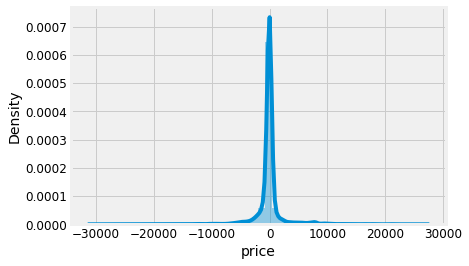

In [542]:
sns.distplot(y_test-y_pred)
plt.show()

In [543]:
from sklearn import metrics

In [544]:
print ("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print ("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print ("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  917.6893168671331
MSE:  5766637.65542858
RMSE:  2401.3824467228415


In [545]:
metrics.r2_score(y_test, y_pred)

0.9868200485563008

In [546]:
metrics.r2_score(y_test, y_pred)

0.9868200485563008

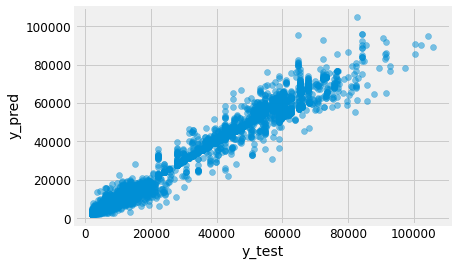

In [547]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [548]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'diffrence':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,diffrence
216996,80985,65688.0400,15296.9600
17365,4019,4032.0800,-13.0800
224585,45257,45257.0000,0.0000
26054,3999,4175.2200,-176.2200
31385,5772,5771.3400,0.6600
35706,25590,19111.5765,6478.4235
3236,4328,3266.3700,1061.6300
15539,10273,8283.6800,1989.3200
39891,3389,2992.1500,396.8500
18947,4496,4482.2400,13.7600


In [557]:
from sklearn.tree import DecisionTreeRegressor

DtReg = DecisionTreeRegressor(random_state = 0)

DtReg.fit(x_train, y_train)



DecisionTreeRegressor(random_state=0)

In [559]:
y_predict_dtr=DtReg.predict((x_test))
from sklearn import metrics 
r_square = metrics.r2_score(y_test,y_predict_dtr)
print('error',r_square)


error 0.979394892522139


In [560]:
x_val=np.arange(min(x_train),max(x_train),0.01)
x_val=x_val.reshape((len(x_val),1))
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_val,DtReg.predict(x_val),color='red')
plt.title('height prediction using dt')
plt.xlabel('actual')
plt.ylabel('predict')
plt.figure(figsize=(1,1))
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'